In [2]:
#导入模块
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
np.random.seed(10)#设定随机种子
print('loading module has finishied')

Using TensorFlow backend.


loading module has finishied


#无法下载数据集解决方案
#依然很慢但是可靠性好一些
import os
import urllib.request

mnist_load_data_command=urllib.request.urlopen(urllib.request.Request('https://raw.githubusercontent.com/SZIIT-Software-Technology/SZIIT-Software-Technology-Class_3-3_Study-Club/master/AI%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E6%A1%86%E6%9E%B6/2018-03-15/mnist-load_data.sh')).read().decode('utf8')
print(os.popen('mnist_load_data_command').read())

In [3]:
#下载数据集
(train_image,train_label),(test_image,test_label)=mnist.load_data()
print('loading mnist has finishied')

loading mnist has finishied


In [4]:
#显示数据集大小及纬度
#训练数据集
print('train_image=',train_image.shape)
print('train_label=',train_label.shape)
#测试数据集
print('test_image=',test_image.shape)
print('test_label=',test_label.shape)

train_image= (60000, 28, 28)
train_label= (60000,)
test_image= (10000, 28, 28)
test_label= (10000,)


In [5]:
#导入图形模块
import matplotlib.pyplot as plt

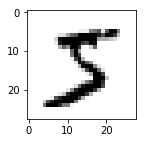

5


In [6]:
#查看单个数据
def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)#按英寸设置图像大小(似乎是唯一的图像大小设定函数)
    plt.imshow(image,cmap='binary')#反转灰度显示图片
    plt.show()
plot_image(train_image[0])
print(train_label[0])
#print(train_image[0])

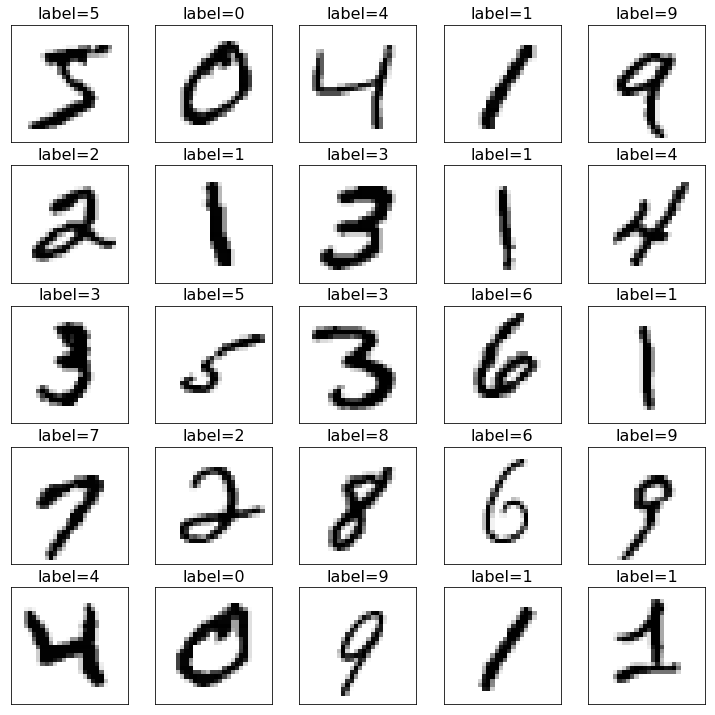

In [7]:
#批量查看数据
#images=图像集,labels=标签集,index=当前索引位置,num_x=显示宽度,num_y=显示高度
def plot_image_labels(images,labels,index,num_x=3,num_y=3):
    fig=plt.gcf()
    fig.set_size_inches(num_x*2.5,num_y*2.5)#每个数据2.5英寸大
    for item in range(num_x*num_y):
        ax=plt.subplot(num_y,num_x,item+1)#num_y行,num_x列,第item+1个图形
        ax.imshow(images[index],cmap='binary')
        title='label='+str(labels[index])
        ax.set_title(title,fontsize=16)
        #设置无坐标
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.axis('off')#设置无坐标和坐标轴
        index+=1
    plt.show()

#plot_image_labels(train_image,train_label,0)
plot_image_labels(train_image,train_label,0,5,5)#显示25个数据

In [8]:
#二维数据转为一维数据
x_train_image=train_image.reshape(len(train_image),784).astype('float')
x_test_image=test_image.reshape(len(test_image),784).astype('float')
print('x_train_image:',x_train_image.shape)
print('x_test_image:',x_test_image.shape)

x_train_image: (60000, 784)
x_test_image: (10000, 784)


In [9]:
#像素归一化
x_train_normalize=x_train_image/255
x_test_normalize=x_test_image/255
#print(x_train_normalize[0,200:300])

In [10]:
#One-Hot Encoding 并转换数据类型为bool
#print(train_label[:10])
y_train_label=np_utils.to_categorical(train_label)
y_train_label=y_train_label.astype('bool')
y_test_label=np_utils.to_categorical(test_label)
y_test_label=y_test_label.astype('bool')
#print(y_train_label[:10])

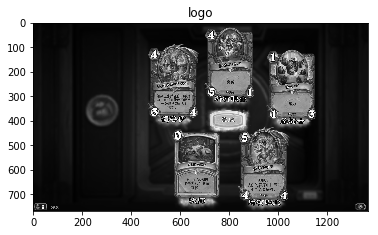

In [12]:
#读取本地图片并转为灰度图片显示
logo=plt.imread('double.png')#读取图片(限定PNG格式?)
#彩色图片转化为灰度图片
#np.dot=矩阵乘法,[...,:3]=四通道色彩只取RGB三通道
#灰度原理https://en.wikipedia.org/wiki/Grayscale
#灰度算法https://blog.csdn.net/xdrt81y/article/details/8289963
#logo = np.dot(logo[...,:3],[0.299, 0.587, 0.114])
plt.imshow(logo[...,:3]@np.array([ 0.299,  0.587, 0.114]),cmap='gray')
plt.title('logo')
plt.show()

# 数字图像处理的主要应用领域
提升数字图像的可供分析的价值